# **libararies**

In [1]:
#importing the libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
import string
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
#from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score

In [2]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.5 MB/s eta 0:00:00


# **Data Insight**

In [3]:
df= pd.read_csv('sentimentdataset.csv')

In [4]:
df.head(5)

,ID,Text,Sentiment (Label),Timestamp,User,Source,Topic,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park! ...,Positive,1/15/2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,1,Traffic was terrible this morning. ...,Negative,1/15/2023 8:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,2,Just finished an amazing workout! 💪 ...,Positive,1/15/2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,3,Excited about the upcoming weekend getaway! ...,Positive,1/15/2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,4,Trying out a new recipe for dinner tonight. ...,Neutral,1/15/2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19


In [5]:
df.shape

(732, 14)

In [6]:
df.dtypes

ID                    int64
Text                 object
Sentiment (Label)    object
Timestamp            object
User                 object
Source               object
Topic                object
Retweets              int64
Likes                 int64
Country              object
Year                  int64
Month                 int64
Day                   int64
Hour                  int64
dtype: object

In [7]:
df.describe()

,ID,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [8]:
df['Sentiment (Label)'].nunique

<bound method IndexOpsMixin.nunique of 0       Positive  
1       Negative  
2       Positive  
3       Positive  
4       Neutral   
          ...     
727         Happy 
728         Happy 
729         Happy 
730         Happy 
731         Happy 
Name: Sentiment (Label), Length: 732, dtype: object>

In [9]:
df['Timestamp'].nunique

<bound method IndexOpsMixin.nunique of 0       1/15/2023 12:30
1        1/15/2023 8:45
2       1/15/2023 15:45
3       1/15/2023 18:20
4       1/15/2023 19:55
             ...       
727     8/18/2017 18:20
728     6/22/2018 14:15
729      4/5/2019 17:30
730     2/29/2020 20:45
731    11/15/2020 15:15
Name: Timestamp, Length: 732, dtype: object>

# Data Preprocessing


## ***Feature Engineering***

In [10]:
import nltk
nltk.download ('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [61]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [14]:
port_stem=PorterStemmer()

In [15]:
print(df['Text'])

0       Enjoying a beautiful day at the park!        ...
1       Traffic was terrible this morning.           ...
2       Just finished an amazing workout! 💪          ...
3       Excited about the upcoming weekend getaway!  ...
4       Trying out a new recipe for dinner tonight.  ...
                             ...                        
727    Collaborating on a science project that receiv...
728    Attending a surprise birthday party organized ...
729    Successfully fundraising for a school charity ...
730    Participating in a multicultural festival, cel...
731    Organizing a virtual talent show during challe...
Name: Text, Length: 732, dtype: object


In [16]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [17]:
def preprocess_text(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)

In [55]:
def preprocesss_text(text):
    tokens = nltk.word_tokenize(text)
    tagged_tokens = nltk.pos_tag(tokens)
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in text]
    processed_text = ''.join(lemmatized_tokens)

    return processed_text

In [69]:
def stem_text(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [port_stem.stem(token) for token in tokens]
    #stemmed_tokenst=re.sub('[^a-zA-z]','',stemmed_tokens)# Stem each token
    return ' '.join(stemmed_tokens)

In [70]:
df['Processed_Text'] = df['Text'].apply(preprocess_text)

In [67]:
df['Stemmed_Text'] = df['Processed_Text'].apply(preprocesss_text)

In [68]:
print(df['Stemmed_Text'])

0                            enjoying beautiful day park
1                               traffic terrible morning
2                               finished amazing workout
3                       excited upcoming weekend getaway
4                       trying new recipe dinner tonight
                             ...                        
727    collaborating science project received recogni...
728    attending surprise birthday party organized fr...
729    successfully fundraising school charity initia...
730    participating multicultural festival celebrati...
731    organizing virtual talent show challenging tim...
Name: Stemmed_Text, Length: 732, dtype: object


In [64]:
df['Stemmed_Text'] = df['Processed_Text'].apply(stem_text)

In [65]:
print(df['Stemmed_Text'])

0                                  enjoy beauti day park
1                                   traffic terribl morn
2                                    finish amaz workout
3                            excit upcom weekend getaway
4                           tri new recip dinner tonight
                             ...                        
727    collabor scienc project receiv recognit region...
728    attend surpris birthday parti organ friend sur...
729    success fundrais school chariti initi joy give...
730    particip multicultur festiv celebr divers musi...
731    organ virtual talent show challeng time bring ...
Name: Stemmed_Text, Length: 732, dtype: object


## **Sentiment Intensity Analyzer**

In [71]:
print(df['Stemmed_Text'])

0                            enjoying beautiful day park
1                               traffic terrible morning
2                               finished amazing workout
3                       excited upcoming weekend getaway
4                       trying new recipe dinner tonight
                             ...                        
727    collaborating science project received recogni...
728    attending surprise birthday party organized fr...
729    successfully fundraising school charity initia...
730    participating multicultural festival celebrati...
731    organizing virtual talent show challenging tim...
Name: Stemmed_Text, Length: 732, dtype: object


In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
df['Sentiment (Label)']=df['Sentiment (Label)'].str.lower().str.strip()
analyzer = SentimentIntensityAnalyzer()

# Define a function to categorize sentiment words using VADER
def categorize_sentiment(word):
    score = analyzer.polarity_scores(word)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_category (y)'] = df['Sentiment (Label)'].apply(categorize_sentiment)

for words in df[['Sentiment (Label)','sentiment_category (y)']].values:
    print(words)

ModuleNotFoundError: No module named 'vaderSentiment'

In [73]:
print(df['sentiment_category (y)'])

0      positive
1      negative
2      positive
3      positive
4       neutral
         ...   
727    positive
728    positive
729    positive
730    positive
731    positive
Name: sentiment_category (y), Length: 732, dtype: object


In [74]:
df['sentiment_category (y)'].value_counts()

sentiment_category (y)
positive    378
negative    183
neutral     171
Name: count, dtype: int64

In [75]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Source'] = label_encoder.fit_transform(df['Source'])

In [76]:
df['sentiment_category (y)']= label_encoder.fit_transform(df['sentiment_category (y)'])

In [77]:
df['Country']= label_encoder.fit_transform(df['Country'])

## **Correlation**

In [78]:
df.dtypes

ID                         int64
Text                      object
Sentiment (Label)         object
Timestamp                 object
User                      object
Source                     int64
Topic                     object
Retweets                   int64
Likes                      int64
Country                    int64
Year                       int64
Month                      int64
Day                        int64
Hour                       int64
Processed_Text            object
Stemmed_Text              object
sentiment_category (y)     int64
dtype: object

In [81]:
df.drop(columns=['ID','Timestamp','User'],inplace=True)

KeyError: "['ID', 'Timestamp', 'User'] not found in axis"

In [82]:
df.drop(columns=['Processed_Text','Sentiment (Label)','Text','Stemmed_Text'])

,Source,Topic,Retweets,Likes,Country,Year,Month,Day,Hour,sentiment_category (y)
0,3,#Nature #Park,15,30,106,2023,1,15,12,2
1,3,#Traffic #Morning,5,10,20,2023,1,15,8,0
2,1,#Fitness #Workout,20,40,108,2023,1,15,15,2
3,0,#Travel #Adventure,8,15,91,2023,1,15,18,2
4,1,#Cooking #Food,12,25,0,2023,1,15,19,1
...,...,...,...,...,...,...,...,...,...,...
727,0,#ScienceFairWinner #HighSchoolScience,20,39,87,2017,8,18,18,2
728,1,#SurpriseCelebration #HighSchoolFriendship,25,48,100,2018,6,22,14,2
729,2,#CommunityGiving #HighSchoolPhilanthropy,22,42,17,2019,4,5,17,2
730,0,#CulturalCelebration #HighSchoolUnity,21,43,87,2020,2,29,20,2


In [83]:
# Access each column individually
country = df['Country']
source = df['Source']
sentiment_category = df['sentiment_category (y)']
hour = df['Hour']
day = df['Day']
month = df['Month']
year = df['Year']
likes = df['Likes']
retweets = df['Retweets']

# Use a list of column names as the key
correlation = df[['Country','Source','sentiment_category (y)','Hour','Day','Month','Year','Likes','Retweets']].corr()

In [84]:
correlation

,Country,Source,sentiment_category (y),Hour,Day,Month,Year,Likes,Retweets
Country,1.000000,-0.020750,0.045508,0.024913,-0.008775,-0.024440,0.077730,0.063093,0.066570
Source,-0.020750,1.000000,-0.048406,-0.122395,-0.075468,-0.061294,-0.026115,-0.068020,-0.065967
sentiment_category (y),0.045508,-0.048406,1.000000,-0.021824,0.019737,-0.082151,0.084878,0.296588,0.298295
Hour,0.024913,-0.122395,-0.021824,1.000000,0.044072,0.137835,-0.087470,0.195331,0.196955
Day,-0.008775,-0.075468,0.019737,0.044072,1.000000,-0.135873,0.021973,0.011489,0.009213
Month,-0.024440,-0.061294,-0.082151,0.137835,-0.135873,1.000000,-0.314845,0.066643,0.073265
Year,0.077730,-0.026115,0.084878,-0.087470,0.021973,-0.314845,1.000000,-0.043415,-0.039982
Likes,0.063093,-0.068020,0.296588,0.195331,0.011489,0.066643,-0.043415,1.000000,0.998482
Retweets,0.066570,-0.065967,0.298295,0.196955,0.009213,0.073265,-0.039982,0.998482,1.000000


<Axes: >

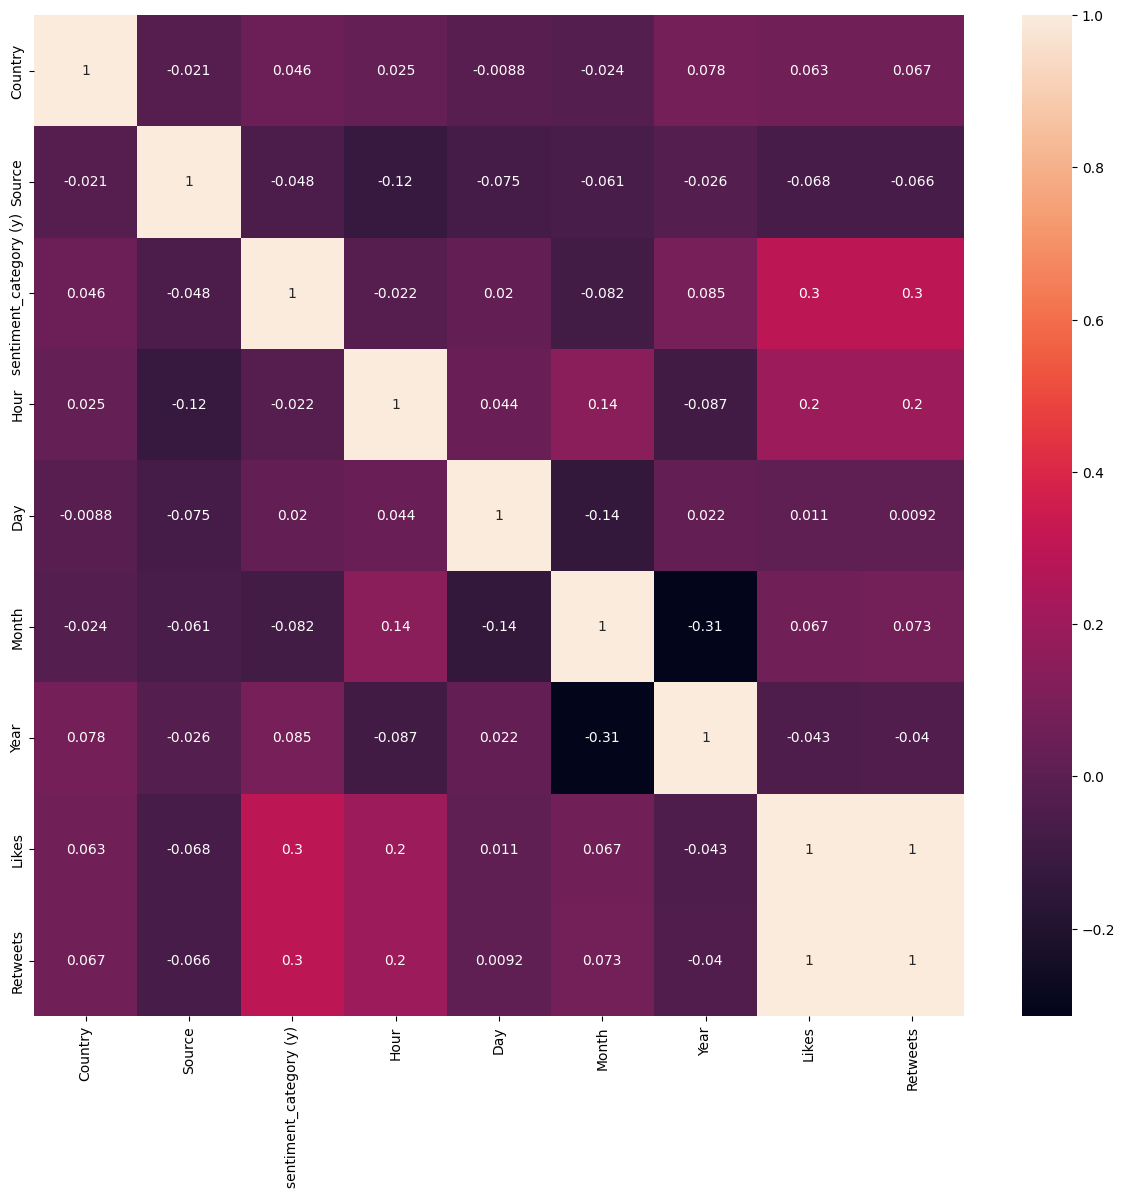

In [85]:
plt.figure(figsize=(15, 13))
sns.heatmap(correlation, annot=True)

In [86]:
df['Source'] = label_encoder.fit_transform(df['Source'])
df['Country']= label_encoder.fit_transform(df['Country'])

In [87]:
df.dtypes

Text                      object
Sentiment (Label)         object
Source                     int64
Topic                     object
Retweets                   int64
Likes                      int64
Country                    int64
Year                       int64
Month                      int64
Day                        int64
Hour                       int64
Processed_Text            object
Stemmed_Text              object
sentiment_category (y)     int64
dtype: object

# Create bag of words representation using CountVectorizer

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
X_topic=v.fit_transform(df['Topic'].values)
X_train_cv = v.fit_transform(df['Stemmed_Text'].values)
X_train_cv


<732x1907 sparse matrix of type '<class 'numpy.int64'>'
	with 5769 stored elements in Compressed Sparse Row format>

In [35]:
X = pd.concat([pd.DataFrame(X_train_cv.toarray()),pd.DataFrame(X_topic.toarray())], axis=1)

**Spliting the Data to trian and Test**

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment_category (y)'], test_size=0.2,random_state=0)

In [37]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# **Creating the Models**

## **Train the naive bayes Model**



In [38]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

 **Cross** **Validation**

In [39]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, df['sentiment_category (y)'], cv=kfold)

In [40]:

# Print the cross-validation scores
print("Cross-validation scores:", scores)

Cross-validation scores: [0.78911565 0.80952381 0.78767123 0.80136986 0.80821918]


In [41]:
# Print the mean and standard deviation of the cross-validation scores
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

Mean accuracy: 0.7991799459509832
Standard deviation: 0.009243804117381882


In [42]:
y_pred_Nb= model.predict(X_test)


In [43]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred_Nb)
print("Accuracy:", accuracy)

Accuracy: 0.7891156462585034


In [44]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred_Nb))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83        31
           1       0.74      0.65      0.69        43
           2       0.84      0.81      0.83        73

    accuracy                           0.79       147
   macro avg       0.77      0.80      0.78       147
weighted avg       0.79      0.79      0.79       147



# **Train the Logistic Regression**

In [88]:
classifier = LogisticRegression(random_state = 0)

In [89]:
# Convert feature names to strings

classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [90]:

y_pred = classifier.predict(X_test)

In [91]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[22,  1,  8],
       [ 2, 19, 22],
       [ 1,  2, 70]])

# In this confusion matrix:

**For the Positive class:**

*   22 true positives (TP)
*    1 false negative (FN)
*    8 false negative (FN)


---


**For the Negative class:**

*   19 true positives (TP)
*    2 false positives (FP)
*    22 false negatives (FN)

---


**For the Neutral class:**

*  70 true positives (TP)
*   1 false positive (FP)
*   2 false positives (FP)

In [92]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.71      0.79        31
           1       0.86      0.44      0.58        43
           2       0.70      0.96      0.81        73

    accuracy                           0.76       147
   macro avg       0.81      0.70      0.73       147
weighted avg       0.79      0.76      0.74       147



## **Cross** **Validation**

In [93]:
scores_log = cross_val_score(classifier, X, df['sentiment_category (y)'], cv=kfold)

In [94]:

print("Cross-validation scores:", scores_log)

Cross-validation scores: [0.80272109 0.85034014 0.82191781 0.82191781 0.78767123]


In [95]:

print("Mean accuracy:", scores_log.mean())
print("Standard deviation:", scores_log.std())

Mean accuracy: 0.8169136147609727
Standard deviation: 0.021090096879262624


In [ ]:
bnbvbv

# Train the SVM Model

In [45]:
svm_classifier = SVC(kernel='linear')

In [46]:
svm_scores = cross_val_score(svm_classifier, X, df['sentiment_category (y)'], cv=kfold)

## **Cross** **Validation**

In [47]:
# Print the cross-validation scores
print("Cross-validation scores:", svm_scores)

Cross-validation scores: [0.82312925 0.8707483  0.82191781 0.82191781 0.80821918]


In [48]:
# Print the mean and standard deviation of the cross-validation scores
print("Mean accuracy:", svm_scores.mean())
print("Standard deviation:", svm_scores.std())

Mean accuracy: 0.8291864691081912
Standard deviation: 0.02149125295771444


In [49]:
# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [50]:
# Predict on the test set
y_pred_svm = svm_classifier.predict(X_test)

In [51]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)

Accuracy: 0.7959183673469388
